In [34]:
## mean temperature

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing,feature_selection

# data source https://climatedata.worldbank.org/ClimateAPIWeb/rest/v2/crunew/cru-ts4.06-timeseries/tas/annual/timeseries/1901-2021/country/IDN
mean_temperature = [25.85,25.91,26.04,25.90,25.92,25.93,25.82,25.84,25.71,25.98,26.08,25.88,25.99,26.05,26.04,26.12,26.23,26.03,26.04,26.20,26.18,25.99]

df1 = pd.DataFrame({
    'value': mean_temperature
})

/home/rizkyd/rizky/data_pertanian/notebook/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-0.59258068]


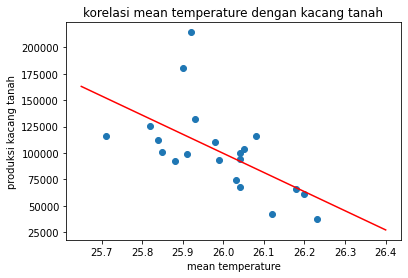

In [35]:

kacang_tanah = pd.read_csv('dataset/kacang_tanah.csv')

df3 = pd.DataFrame({
    'x':df1['value'].values,
    'y':kacang_tanah['total']
})
df3 = df3.head(21)

x = df3['x'].values.reshape(-1,1)
y = df3['y'].values.reshape(-1,1)

print(feature_selection.r_regression(x,y))

x = df3['x'].values.reshape(-1,1)
y = df3['y']

model = LinearRegression()
model.fit(x,y)

x_vis = np.array([25.65,26.4]).reshape(-1,1)
y_vis = model.predict(x_vis)

plt.scatter(x=df3['x'],y=df3['y'])
plt.plot(x_vis,y_vis,'-r')
plt.xlabel('mean temperature')
plt.ylabel('produksi kacang tanah')
plt.title('korelasi mean temperature dengan kacang tanah')
plt.show()





In [36]:
model.predict([[26.60]])

array([-9058.15238902])

/home/rizkyd/rizky/data_pertanian/notebook/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-0.59805328]


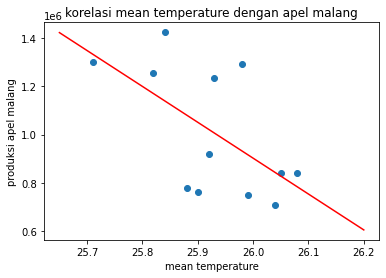

In [39]:
df4 = pd.DataFrame({
    'x':df1['value'][3:15],
    'y':[763370,919012,1235569,1255450,1425116,1303299,1291352,842799,777336,748076,838915,708438]
})



x = df4['x'].values.reshape(-1,1)
y = df4['y'].values.reshape(-1,1)

model_2 = LinearRegression()
model_2.fit(x,df4['y'])

x_vis = np.array([25.65,26.2]).reshape(-1,1)
y_vis = model_2.predict(x_vis)


print(feature_selection.r_regression(x,y))
plt.scatter(df4['x'],df4['y'])
plt.plot(x_vis,y_vis,'-r')
plt.xlabel('mean temperature')
plt.ylabel('produksi apel malang')
plt.title('korelasi mean temperature dengan apel malang')
plt.show()


In [43]:
model_2.predict([[26.60]])

array([8730.86120577])

/home/rizkyd/rizky/data_pertanian/notebook/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.65111193]


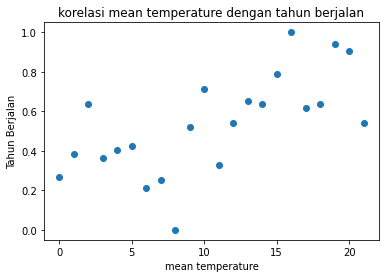

In [ ]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(df1)
x = x_scaled.flatten()

df6 = pd.DataFrame({
    'y':x,
    'x':[i for i in range(22)]
})

x = df6['x'].values.reshape(-1,1)
y = df6['y'].values.reshape(-1,1)

print(feature_selection.r_regression(x,y))

plt.scatter(df6['x'],df6['y'])
plt.xlabel('mean temperature')
plt.ylabel('Tahun Berjalan')
plt.title('korelasi mean temperature dengan tahun berjalan')
plt.show()


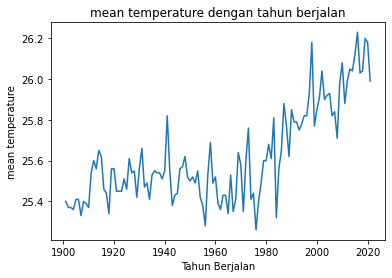

/home/rizkyd/rizky/data_pertanian/notebook/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.74682312]


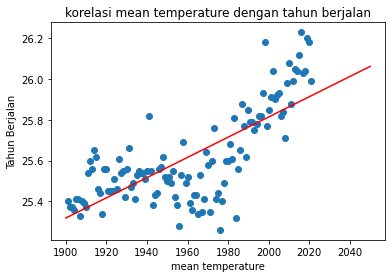

In [ ]:
import json
file = open('dataset/mean_temperature.json')
data = json.load(file)
year = []
mean_temperature = []
for key,value in data.items():
    year.append(int(key))
    mean_temperature.append(float(value))

mean_temp = pd.DataFrame({
    'year':year,
    'mean_temp':mean_temperature
})
mean_temp

plt.plot(mean_temp['year'],mean_temp['mean_temp'])
plt.xlabel('Tahun Berjalan')
plt.ylabel('mean temperature')
plt.title('mean temperature dengan tahun berjalan')
plt.show()

x = mean_temp['year'].values.reshape(-1,1)
y = mean_temp['mean_temp'].values.reshape(-1,1)

print(feature_selection.r_regression(x,y))

model_2 = LinearRegression()
model_2.fit(x,mean_temp['mean_temp'])

x_vis = np.array([1900,2050]).reshape(-1,1)
y_vis = model_2.predict(x_vis)

plt.scatter(x=mean_temp['year'],y=mean_temp['mean_temp'])
plt.plot(x_vis,y_vis,'-r')
plt.xlabel('mean temperature')
plt.ylabel('Tahun Berjalan')
plt.title('korelasi mean temperature dengan tahun berjalan')
plt.show()

In [ ]:
# predict
model_2.predict([[2050]])

array([26.06242433])